In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import csv
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns
import sklearn
import impyute

C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Imesh Ekanayake\.conda\envs\

In [2]:
data = pd.read_csv('credit_card_default_train.csv') 


In [3]:
Test_data = pd.read_csv('credit_card_default_test.csv') 


In [4]:
print(data.shape) #Shape of the data frame

data.describe()#statistical data

(24000, 25)


,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,24000.000000,2.400000e+04,24000.000000
mean,-0.014208,-0.130042,-0.158667,-0.215542,-0.261167,-0.287667,1.188697e+05,1.140727e+05,1.092435e+05,1.003573e+05,9.377699e+04,9.034068e+04,1.330648e+04,1.386675e+04,1.209312e+04,1.122527e+04,11174.737208,1.230122e+04,0.222083
std,1.124897,1.200566,1.198875,1.166608,1.131855,1.147847,1.710424e+05,1.652414e+05,1.614737e+05,1.490071e+05,1.417389e+05,1.387237e+05,3.935742e+04,5.648588e+04,4.065924e+04,3.624693e+04,36040.821759,4.233848e+04,0.415656
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-3.824900e+05,-1.611850e+05,-1.420790e+05,-3.927000e+05,-1.878820e+05,-7.844830e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,8.246250e+03,6.968750e+03,6.238500e+03,5.429000e+03,4.179750e+03,2.913000e+03,2.310000e+03,1.956000e+03,9.010000e+02,6.930000e+02,610.000000,3.070000e+02,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.156850e+04,4.871700e+04,4.641150e+04,4.410500e+04,4.186300e+04,3.940900e+04,4.920000e+03,4.646500e+03,4.197000e+03,3.465000e+03,3465.000000,3.465000e+03,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.562745e+05,1.489050e+05,1.401622e+05,1.269750e+05,1.169262e+05,1.144352e+05,1.160500e+04,1.155000e+04,1.062600e+04,9.360000e+03,9411.500000,9.252500e+03,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2.228020e+06,2.272881e+06,3.844046e+06,2.059564e+06,2.141765e+06,2.221444e+06,2.017905e+06,3.890638e+06,2.069852e+06,1.434510e+06,965557.000000,1.221218e+06,1.000000


In [5]:
data.isna().sum()

Client_ID             0
Balance_Limit_V1      0
Gender                0
EDUCATION_STATUS      0
MARITAL_STATUS        0
AGE                   0
PAY_JULY              0
PAY_AUG               0
PAY_SEP               0
PAY_OCT               0
PAY_NOV               0
PAY_DEC               0
DUE_AMT_JULY          0
DUE_AMT_AUG           0
DUE_AMT_SEP           0
DUE_AMT_OCT           0
DUE_AMT_NOV           0
DUE_AMT_DEC           0
PAID_AMT_JULY         0
PAID_AMT_AUG          0
PAID_AMT_SEP          0
PAID_AMT_OCT          0
PAID_AMT_NOV          0
PAID_AMT_DEC          0
NEXT_MONTH_DEFAULT    0
dtype: int64

In [6]:
t=data.columns
print(len(t))
t

25


Index(['Client_ID', 'Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'NEXT_MONTH_DEFAULT'],
      dtype='object')

In [7]:
for i in t:
    print(i,"\t",data[i].unique())

Client_ID 	 ['A2' 'A3' 'A4' ... 'A29998' 'A29999' 'A30000']
Balance_Limit_V1 	 ['1M' '100K' '200K' '400K' ' 500K' '300K' '1.5M' '2.5M']
Gender 	 ['M' 'F']
EDUCATION_STATUS 	 ['Graduate' 'High School' 'Other']
MARITAL_STATUS 	 ['Other' 'Single']
AGE 	 ['31-45' 'Less than 30' '46-65' 'More than 65']
PAY_JULY 	 [-1  0  4  2  1 -2  3  5  7  8  6]
PAY_AUG 	 [-1  3  0  2 -2  4  6  5  7  1  8]
PAY_SEP 	 [-1  2  0 -2  3  7  4  5  6  1  8]
PAY_OCT 	 [-1  2  0 -2  7  3  4  5  6  1  8]
PAY_NOV 	 [-1 -2  0  2  3  7  4  5  8  6]
PAY_DEC 	 [-1  0 -2  2  3  7  4  6  8  5]
DUE_AMT_JULY 	 [  3248 353351  16681 ...   3888  -3800 110716]
DUE_AMT_AUG 	 [  3389 151818  16082 ...   7752 181055 112971]
DUE_AMT_SEP 	 [  6004  26948  15477 ...   6371 176262 114955]
DUE_AMT_OCT 	 [ 39418  43530      0 ...  48228 121908  84396]
DUE_AMT_NOV 	 [162772  80811      0 ...  72157  11989  74909]
DUE_AMT_DEC 	 [-13982 124590      0 ...  44715 113061  35373]
PAID_AMT_JULY 	 [  3437 151818      0 ...  20420  23167 198429]

In [ ]:

data["Gender"]=data["Gender"].replace('M',1,regex=True) #Male = 1
data["Gender"]=data["Gender"].replace('F',0,regex=True) #Female =0


data["MARITAL_STATUS"]=data["MARITAL_STATUS"].replace('Other',1,regex=True) #Male = 1
data["MARITAL_STATUS"]=data["MARITAL_STATUS"].replace('Single',0,regex=True) #Female =0


data["EDUCATION_STATUS"]=data["EDUCATION_STATUS"].replace('Other',1,regex=True) #Male = 1
data["EDUCATION_STATUS"]=data["EDUCATION_STATUS"].replace('High School',2,regex=True) #Female =0
data["EDUCATION_STATUS"]=data["EDUCATION_STATUS"].replace('Graduate',3,regex=True) #Female =0


data["AGE"]=data["AGE"].replace('Less than 30',1,regex=True) #Male = 1
data["AGE"]=data["AGE"].replace('31-45',2,regex=True) #Female =0
data["AGE"]=data["AGE"].replace('46-65',3,regex=True) #Male = 1
data["AGE"]=data["AGE"].replace('More than 65',4,regex=True) #Female =0

data['Gender']= data['Gender'].apply(pd.to_numeric)
data['MARITAL_STATUS']= data['MARITAL_STATUS'].apply(pd.to_numeric)
data['EDUCATION_STATUS']= data['EDUCATION_STATUS'].apply(pd.to_numeric)
data['AGE']= data['AGE'].apply(pd.to_numeric)

for  i  in range(data["Balance_Limit_V1"].count()):
    if  type(data["Balance_Limit_V1"][i])==str and data["Balance_Limit_V1"][i][-1] == 'M' :
       
        data["Balance_Limit_V1"][i] = int(float(data["Balance_Limit_V1"][i][:-1])*1000)
    elif type(data["Balance_Limit_V1"][i])==str and data["Balance_Limit_V1"][i][-1] == 'K' :
        data["Balance_Limit_V1"][i] = int(float(data["Balance_Limit_V1"][i][:-1]))
        
data['Balance_Limit_V1']= data['Balance_Limit_V1'].apply(pd.to_numeric)

Data=data
Data.dtypes



In [26]:

Test_data["Gender"]=Test_data["Gender"].replace('M',1,regex=True) #Male = 1
Test_data["Gender"]=Test_data["Gender"].replace('F',0,regex=True) #Female =0


Test_data["MARITAL_STATUS"]=Test_data["MARITAL_STATUS"].replace('Other',1,regex=True) #Male = 1
Test_data["MARITAL_STATUS"]=Test_data["MARITAL_STATUS"].replace('Single',0,regex=True) #Female =0


Test_data["EDUCATION_STATUS"]=Test_data["EDUCATION_STATUS"].replace('Other',1,regex=True) #Male = 1
Test_data["EDUCATION_STATUS"]=Test_data["EDUCATION_STATUS"].replace('High School',2,regex=True) #Female =0
Test_data["EDUCATION_STATUS"]=Test_data["EDUCATION_STATUS"].replace('Graduate',3,regex=True) #Female =0


Test_data["AGE"]=Test_data["AGE"].replace('Less than 30',1,regex=True) #Male = 1
Test_data["AGE"]=Test_data["AGE"].replace('31-45',2,regex=True) #Female =0
Test_data["AGE"]=Test_data["AGE"].replace('46-65',3,regex=True) #Male = 1
Test_data["AGE"]=Test_data["AGE"].replace('More than 65',4,regex=True) #Female =0

for  i  in range(Test_data["Balance_Limit_V1"].count()):
    if  type(Test_data["Balance_Limit_V1"][i])==str and Test_data["Balance_Limit_V1"][i][-1] == 'M' :
       
        Test_data["Balance_Limit_V1"][i] = int(float(Test_data["Balance_Limit_V1"][i][:-1])*1000)
    elif type(Test_data["Balance_Limit_V1"][i])==str and Test_data["Balance_Limit_V1"][i][-1] == 'K' :
        Test_data["Balance_Limit_V1"][i] = int(float(Test_data["Balance_Limit_V1"][i][:-1]))
        
Test_data['Balance_Limit_V1']= Test_data['Balance_Limit_V1'].apply(pd.to_numeric)

Test_Data=Test_data
Test_Data.dtypes

Client_ID           object
Balance_Limit_V1     int64
Gender               int64
EDUCATION_STATUS     int64
MARITAL_STATUS       int64
AGE                  int64
PAY_JULY             int64
PAY_AUG              int64
PAY_SEP              int64
PAY_OCT              int64
PAY_NOV              int64
PAY_DEC              int64
DUE_AMT_JULY         int64
DUE_AMT_AUG          int64
DUE_AMT_SEP          int64
DUE_AMT_OCT          int64
DUE_AMT_NOV          int64
DUE_AMT_DEC          int64
PAID_AMT_JULY        int64
PAID_AMT_AUG         int64
PAID_AMT_SEP         int64
PAID_AMT_OCT         int64
PAID_AMT_NOV         int64
PAID_AMT_DEC         int64
dtype: object

In [12]:
corrMatrix = Data.corr()
cls=(abs(corrMatrix['NEXT_MONTH_DEFAULT']))
p=cls.sort_values(ascending=False)

t=p.index
print(len(t))
t

24


Index(['NEXT_MONTH_DEFAULT', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'Balance_Limit_V1', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'Gender', 'EDUCATION_STATUS', 'MARITAL_STATUS',
       'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT',
       'DUE_AMT_NOV', 'DUE_AMT_DEC', 'AGE'],
      dtype='object')

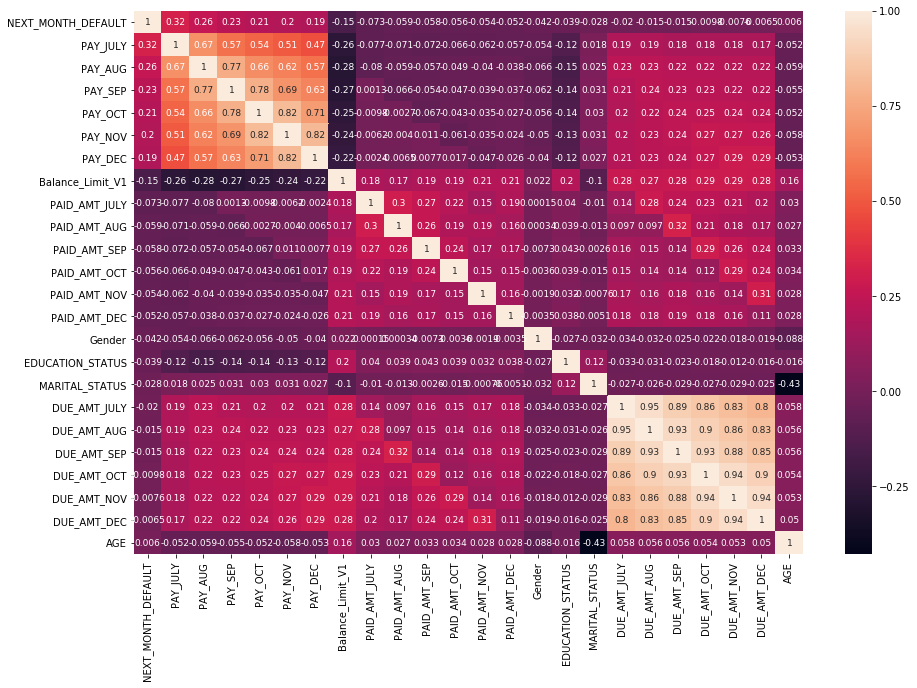

In [13]:
from pandas import DataFrame
import seaborn as sn


df = DataFrame(Data[t],columns=t)
                        
fig, ax = plt.subplots(figsize=(15,10),sharex=True, sharey=True) 
corrMatrix = df.corr()

sn.heatmap(corrMatrix, annot=True,annot_kws={"size": 9},ax=ax)

In [28]:
# Training model

def models(X_train,Y_train):
    
    #Use Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0,solver='lbfgs')
    log.fit(X_train,Y_train)
    print("Logistic Regression DONE")
    
    #Use Kneighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors = 500,metric="minkowski",p=2)
    knn.fit(X_train,Y_train)
    print("KNN DONE")
    
#     #Use SVC (linear kernel)
#     from sklearn.svm import SVC
#     svc_lin=SVC(kernel="linear",random_state=5)
#     svc_lin.fit(X_train,Y_train)
#     print("SVC linear DONE")
    
#     #Use SVC (RBF kernel)
#     from sklearn.svm import SVC
#     svc_rbf=SVC(kernel="rbf",gamma='auto',random_state=9)
#     svc_rbf.fit(X_train,Y_train)
#     print("SVC RBF DONE")
    
    #Use GaussianNB
#     from sklearn.naive_bayes import GaussianNB
#     gauss = GaussianNB()
#     gauss.fit(X_train,Y_train)
#     print("GaussianNB DONE")
    
    #Use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier( criterion="entropy" ,random_state=0)
    tree.fit(X_train,Y_train)
    print("Decision Tree DONE")
    
    #Use Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)
    forest.fit(X_train,Y_train)
    print("Random Forest DONE")
    
    #Use XGBClassifier
    import xgboost as xgb
    modelx=xgb.XGBClassifier(random_state=1,learning_rate=0.001)
    modelx.fit(X_train,Y_train)
    print("XGBClassifier DONE")
    
    #Use ExtraTreesClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    ExtraTree=ExtraTreesClassifier(n_estimators=100, max_depth=None,min_samples_split=2, random_state=8)
    ExtraTree.fit(X_train,Y_train)
    print("ExtraTreesClassifier DONE")
    
    #use AdaBoostClassifier
    from sklearn.ensemble import AdaBoostClassifier
    AdaBoost = AdaBoostClassifier(n_estimators=100)
    AdaBoost.fit(X_train,Y_train)
    print("AdaBoostClassifier DONE\n")
    
    #print the accuracy of each model
    print("[0] Logistic Regression Training Accuracy: ",log.score(X_train,Y_train))
    print("[1] K Neighbors Regression Training Accuracy: ",knn.score(X_train,Y_train))
#     print("[2] SVC Linear Training Accuracy: ",svc_lin.score(X_train,Y_train))
#     print("[3] SVC RBF Training Accuracy: ",svc_rbf.score(X_train,Y_train))
#     print("[4] Gaussian NB Training Accuracy: ",gauss.score(X_train,Y_train))
    print("[5] Decision Tree Training Accuracy: ",tree.score(X_train,Y_train))
    print("[6] Random Forest Training Accuracy: ",forest.score(X_train,Y_train))
    print("[7] XGBClassifier Training Accuracy: ",modelx.score(X_train,Y_train))
    print("[8] ExtraTreesClassifier Training Accuracy: ",ExtraTree.score(X_train,Y_train))
    print("[9] AdaBoostClassifierr Training Accuracy: ",AdaBoost.score(X_train,Y_train))
    
#     svc_lin, svc_rbf,gauss,
    return  log,knn,   tree, forest,modelx,ExtraTree,AdaBoost

In [29]:
highCo=[ 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'Balance_Limit_V1', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'Gender', 'EDUCATION_STATUS', 'MARITAL_STATUS',
       'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT',
       'DUE_AMT_NOV', 'DUE_AMT_DEC', 'AGE']




p=[ 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT','PAY_NOV', 'PAY_DEC']
p=highCo
X=data.loc[:,p]
Y=data.loc[:,['NEXT_MONTH_DEFAULT']]




# Train and test set 70% : 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=1)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(data),"        Train and test set 70% : 30%")
print("============================================================================================\n\n")


model = models(X_train,Y_train)
# "SVC Linear","SVC RBF","Gaussian NB",
ms=["Logistic Regression","K Neighbors","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifier"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    F1=2*(Precision*Recall)/(Precision+Recall)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score)
    print(ms[i],'Testing Precision = ',Precision)
    print(ms[i],'Testing Recall = ',Recall)
    print(ms[i],'Testing F1 = ',F1)
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    
    print("\n"*2)
    


Only considering ['PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC', 'Balance_Limit_V1', 'PAID_AMT_JULY', 'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV', 'PAID_AMT_DEC', 'Gender', 'EDUCATION_STATUS', 'MARITAL_STATUS', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'AGE'] 
size = 24000         Train and test set 70% : 30%




C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression DONE
KNN DONE
Decision Tree DONE
Random Forest DONE
XGBClassifier DONE
ExtraTreesClassifier DONE
AdaBoostClassifier DONE

[0] Logistic Regression Training Accuracy:  0.7778703703703703
[1] K Neighbors Regression Training Accuracy:  0.777962962962963
[5] Decision Tree Training Accuracy:  0.9943055555555556
[6] Random Forest Training Accuracy:  0.9943055555555556
[7] XGBClassifier Training Accuracy:  0.8207407407407408
[8] ExtraTreesClassifier Training Accuracy:  0.9943055555555556
[9] AdaBoostClassifierr Training Accuracy:  0.8191666666666667


Logistic Regression Testing Accuracy =  0.7775
Logistic Regression Testing Precision =  nan
Logistic Regression Testing Recall =  0.0
Logistic Regression Testing F1 =  nan
	TP: 0 	FP: 0 
	TN: 1866 	FN: 534





C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in longlong_scalars


K Neighbors Testing Accuracy =  0.7775
K Neighbors Testing Precision =  nan
K Neighbors Testing Recall =  0.0
K Neighbors Testing F1 =  nan
	TP: 0 	FP: 0 
	TN: 1866 	FN: 534



Decision Tree Testing Accuracy =  0.7270833333333333
Decision Tree Testing Precision =  0.39658119658119656
Decision Tree Testing Recall =  0.4344569288389513
Decision Tree Testing F1 =  0.41465594280607687
	TP: 232 	FP: 353 
	TN: 1513 	FN: 302



Random Forest Testing Accuracy =  0.81625
Random Forest Testing Precision =  0.6439628482972136
Random Forest Testing Recall =  0.3895131086142322
Random Forest Testing F1 =  0.485414235705951
	TP: 208 	FP: 115 
	TN: 1751 	FN: 326



XGBClassifier Testing Accuracy =  0.8216666666666667
XGBClassifier Testing Precision =  0.6687898089171974
XGBClassifier Testing Recall =  0.39325842696629215
XGBClassifier Testing F1 =  0.49528301886792453
	TP: 210 	FP: 104 
	TN: 1762 	FN: 324



ExtraTreesClassifier Testing Accuracy =  0.8075
ExtraTreesClassifier Testing Precision =  0.6

Decision Tree
                  importance
feature                     
PAY_JULY               0.125
DUE_AMT_JULY           0.082
PAID_AMT_SEP           0.069
DUE_AMT_AUG            0.062
DUE_AMT_DEC            0.061
PAID_AMT_DEC           0.057
PAID_AMT_JULY          0.057
PAID_AMT_AUG           0.057
DUE_AMT_OCT            0.055
DUE_AMT_NOV            0.054
PAID_AMT_NOV           0.054
PAID_AMT_OCT           0.051
DUE_AMT_SEP            0.050
PAY_AUG                0.033
Balance_Limit_V1       0.030
AGE                    0.021
EDUCATION_STATUS       0.019
MARITAL_STATUS         0.017
PAY_DEC                0.013
Gender                 0.011
PAY_NOV                0.011
PAY_OCT                0.006
PAY_SEP                0.006


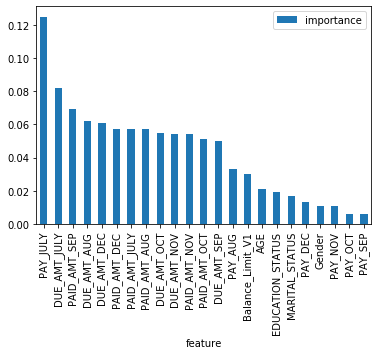

In [16]:
print("Decision Tree")
i=2
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

Random Forest
                  importance
feature                     
PAY_JULY               0.078
DUE_AMT_JULY           0.071
DUE_AMT_AUG            0.062
DUE_AMT_SEP            0.059
PAID_AMT_JULY          0.059
DUE_AMT_OCT            0.058
DUE_AMT_DEC            0.057
DUE_AMT_NOV            0.057
PAID_AMT_AUG           0.055
PAID_AMT_DEC           0.054
PAID_AMT_SEP           0.054
PAID_AMT_NOV           0.051
PAID_AMT_OCT           0.051
PAY_AUG                0.041
Balance_Limit_V1       0.037
PAY_SEP                0.027
AGE                    0.023
EDUCATION_STATUS       0.022
PAY_DEC                0.019
PAY_NOV                0.019
PAY_OCT                0.017
Gender                 0.014
MARITAL_STATUS         0.014


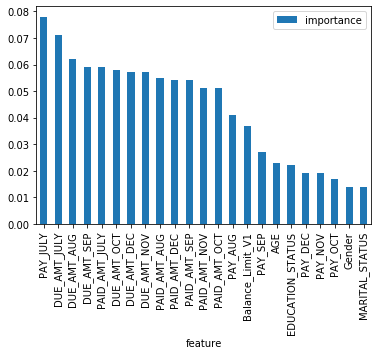

In [17]:
print("Random Forest")
i=3
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

XGB Classifier
                  importance
feature                     
PAY_JULY               0.736
PAY_AUG                0.144
PAID_AMT_SEP           0.047
PAID_AMT_AUG           0.045
DUE_AMT_JULY           0.013
PAY_DEC                0.012
DUE_AMT_DEC            0.003
EDUCATION_STATUS       0.000
DUE_AMT_NOV            0.000
DUE_AMT_OCT            0.000
DUE_AMT_SEP            0.000
DUE_AMT_AUG            0.000
MARITAL_STATUS         0.000
PAID_AMT_NOV           0.000
Gender                 0.000
PAID_AMT_DEC           0.000
PAID_AMT_OCT           0.000
PAID_AMT_JULY          0.000
Balance_Limit_V1       0.000
PAY_NOV                0.000
PAY_OCT                0.000
PAY_SEP                0.000
AGE                    0.000


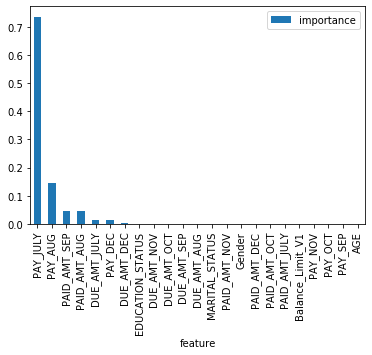

In [18]:
print("XGB Classifier")
i=4
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

ExtraTreesClassifier
                  importance
feature                     
PAY_JULY               0.094
DUE_AMT_JULY           0.057
DUE_AMT_AUG            0.051
PAID_AMT_DEC           0.051
PAY_AUG                0.050
DUE_AMT_OCT            0.049
DUE_AMT_SEP            0.049
Balance_Limit_V1       0.049
DUE_AMT_DEC            0.048
PAID_AMT_JULY          0.048
DUE_AMT_NOV            0.047
PAID_AMT_NOV           0.047
PAID_AMT_AUG           0.047
PAID_AMT_SEP           0.046
PAID_AMT_OCT           0.045
PAY_SEP                0.038
PAY_NOV                0.034
PAY_DEC                0.033
AGE                    0.033
PAY_OCT                0.031
EDUCATION_STATUS       0.025
MARITAL_STATUS         0.014
Gender                 0.013


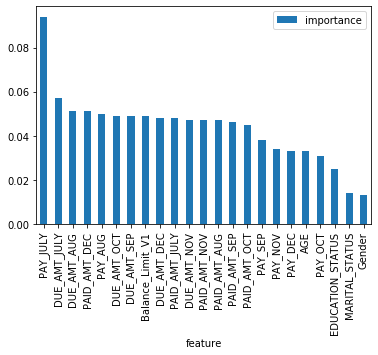

In [19]:
print("ExtraTreesClassifier")
i=5
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

AdaBoostClassifier
                  importance
feature                     
PAY_JULY                0.10
DUE_AMT_SEP             0.10
DUE_AMT_JULY            0.10
PAID_AMT_SEP            0.08
DUE_AMT_DEC             0.07
PAID_AMT_JULY           0.06
DUE_AMT_AUG             0.06
PAID_AMT_NOV            0.06
PAID_AMT_AUG            0.05
PAID_AMT_OCT            0.05
DUE_AMT_OCT             0.05
DUE_AMT_NOV             0.05
PAY_AUG                 0.04
Balance_Limit_V1        0.03
PAID_AMT_DEC            0.02
PAY_DEC                 0.02
PAY_NOV                 0.02
PAY_SEP                 0.02
Gender                  0.01
MARITAL_STATUS          0.01
EDUCATION_STATUS        0.00
PAY_OCT                 0.00
AGE                     0.00


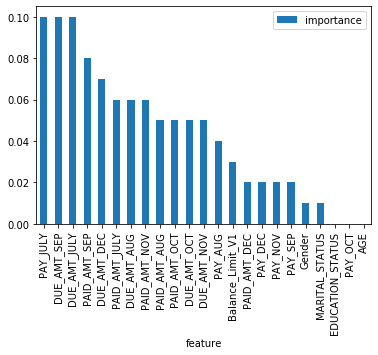

In [20]:
#weights for each feature
print("AdaBoostClassifier")
i=6
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,4)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

                  feature_importance
PAY_JULY                    0.002457
PAY_AUG                     0.002397
PAY_SEP                     0.002227
PAY_OCT                     0.002250
PAY_NOV                     0.002216
PAY_DEC                     0.002227
Balance_Limit_V1            0.945452
PAID_AMT_JULY               0.009128
PAID_AMT_AUG                0.008349
PAID_AMT_SEP                0.003721
PAID_AMT_OCT                0.002697
PAID_AMT_NOV                0.001010
PAID_AMT_DEC                0.000326
Gender                      0.001247
EDUCATION_STATUS            0.003474
MARITAL_STATUS              0.001124
DUE_AMT_JULY                0.002723
DUE_AMT_AUG                 0.000708
DUE_AMT_SEP                 0.000982
DUE_AMT_OCT                 0.000830
DUE_AMT_NOV                 0.001048
DUE_AMT_DEC                 0.000179
AGE                         0.003231


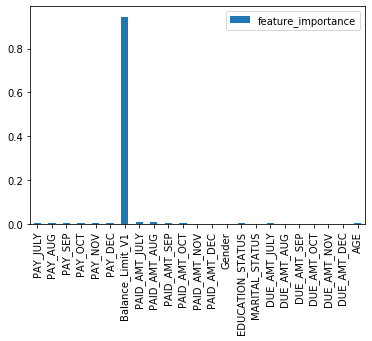

In [21]:
from sklearn.linear_model import LogisticRegression

feature_importance = abs(model[0].coef_)
feature_importance =  (feature_importance / feature_importance.sum())
index = p

df = pd.DataFrame({'feature_importance': feature_importance[0]}, index=index)
print(df)
ax = df.plot.bar(rot=90)

In [22]:
#X_train,X_test,Y_train,Y_test

X_train_N=[]
for i in range (len(model)):
    pr= model[i].predict(X_train)
    X_train_N+=[pr]

X_train_N=np.array(X_train_N)
X_train_N=X_train_N.transpose()

print(X_train_N.shape)
print(Y_train.shape)


(21600, 7)
(21600,)


In [23]:
#X_train,X_test,Y_train,Y_test

X_test_N=[]
for i in range (len(model)):
    pr= model[i].predict(X_test)
    X_test_N+=[pr]
    
X_test_N=np.array(X_test_N)
X_test_N=X_test_N.transpose()

print(X_test_N.shape)
print(Y_test.shape)


(2400, 7)
(2400, 1)


In [24]:
p=[ 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'Balance_Limit_V1', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'Gender', 'EDUCATION_STATUS', 'MARITAL_STATUS',
       'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT',
       'DUE_AMT_NOV', 'DUE_AMT_DEC', 'AGE']

X=Test_data.loc[:,p]
PRED=[]
for i in range (len(model)):
    pr= model[i].predict(X)
    PRED+=[pr]

PRED=np.array(PRED)
PRED=PRED.transpose()



In [25]:
p=[ 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT','PAY_NOV', 'PAY_DEC']

X=Test_data.loc[:,p]
pred= model[9].predict(X)

IndexError: tuple index out of range

In [ ]:

np.savetxt("output.csv", pred, delimiter=",")

In [ ]:
Data.dtypes

In [ ]:
#Age distribution 
sns.countplot(data["Balance_Limit_V1"])

sorted(Data["Balance_Limit_V1"].unique())

In [ ]:
#nural network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

highCo=[ 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'PAID_AMT_JULY', 'PAID_AMT_AUG', 'PAID_AMT_SEP',
       'PAID_AMT_OCT', 'PAID_AMT_NOV', 'PAID_AMT_DEC', 'Gender',
       'EDUCATION_STATUS', 'MARITAL_STATUS', 'DUE_AMT_JULY', 'DUE_AMT_AUG',
       'DUE_AMT_SEP', 'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'AGE']

print(len(highCo))


p=[ 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT','PAY_NOV', 'PAY_DEC',"Balance_Limit_V1", 'DUE_AMT_JULY', 'DUE_AMT_AUG',
       'DUE_AMT_SEP', 'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC']


subData = Data.loc[:,p+['NEXT_MONTH_DEFAULT']]


X=subData.loc[:,p]
Y=subData.loc[:,['NEXT_MONTH_DEFAULT']]
print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData))
print("============================================================================================\n\n")


CNN = MLPClassifier(hidden_layer_sizes=(400,300,100,80,60,40,20,10), max_iter=250, activation='tanh',solver='adam',
                    verbose=20,  random_state=8,tol=0.00001,alpha=0.01)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
Y_train = np.array(np.ravel(Y_train)).astype(int)

CNN.fit(X_train, Y_train)
print("MLPClassifier Training Accuracy:",CNN.score(X_train, Y_train),"\n")



from sklearn.metrics import confusion_matrix

cm= confusion_matrix(Y_test,CNN.predict(X_test))

#Extract  TN, FP ,FN, TP
TN, FP ,FN, TP =  cm.ravel()

test_score=(TP+TN)/(TN+ FP +FN+ TP)
#print(cm)
print("MLPClassifier ",'Testing Accuracy = ',test_score,"\n")
print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
print("\n"*2)

IndexError: list index out of range

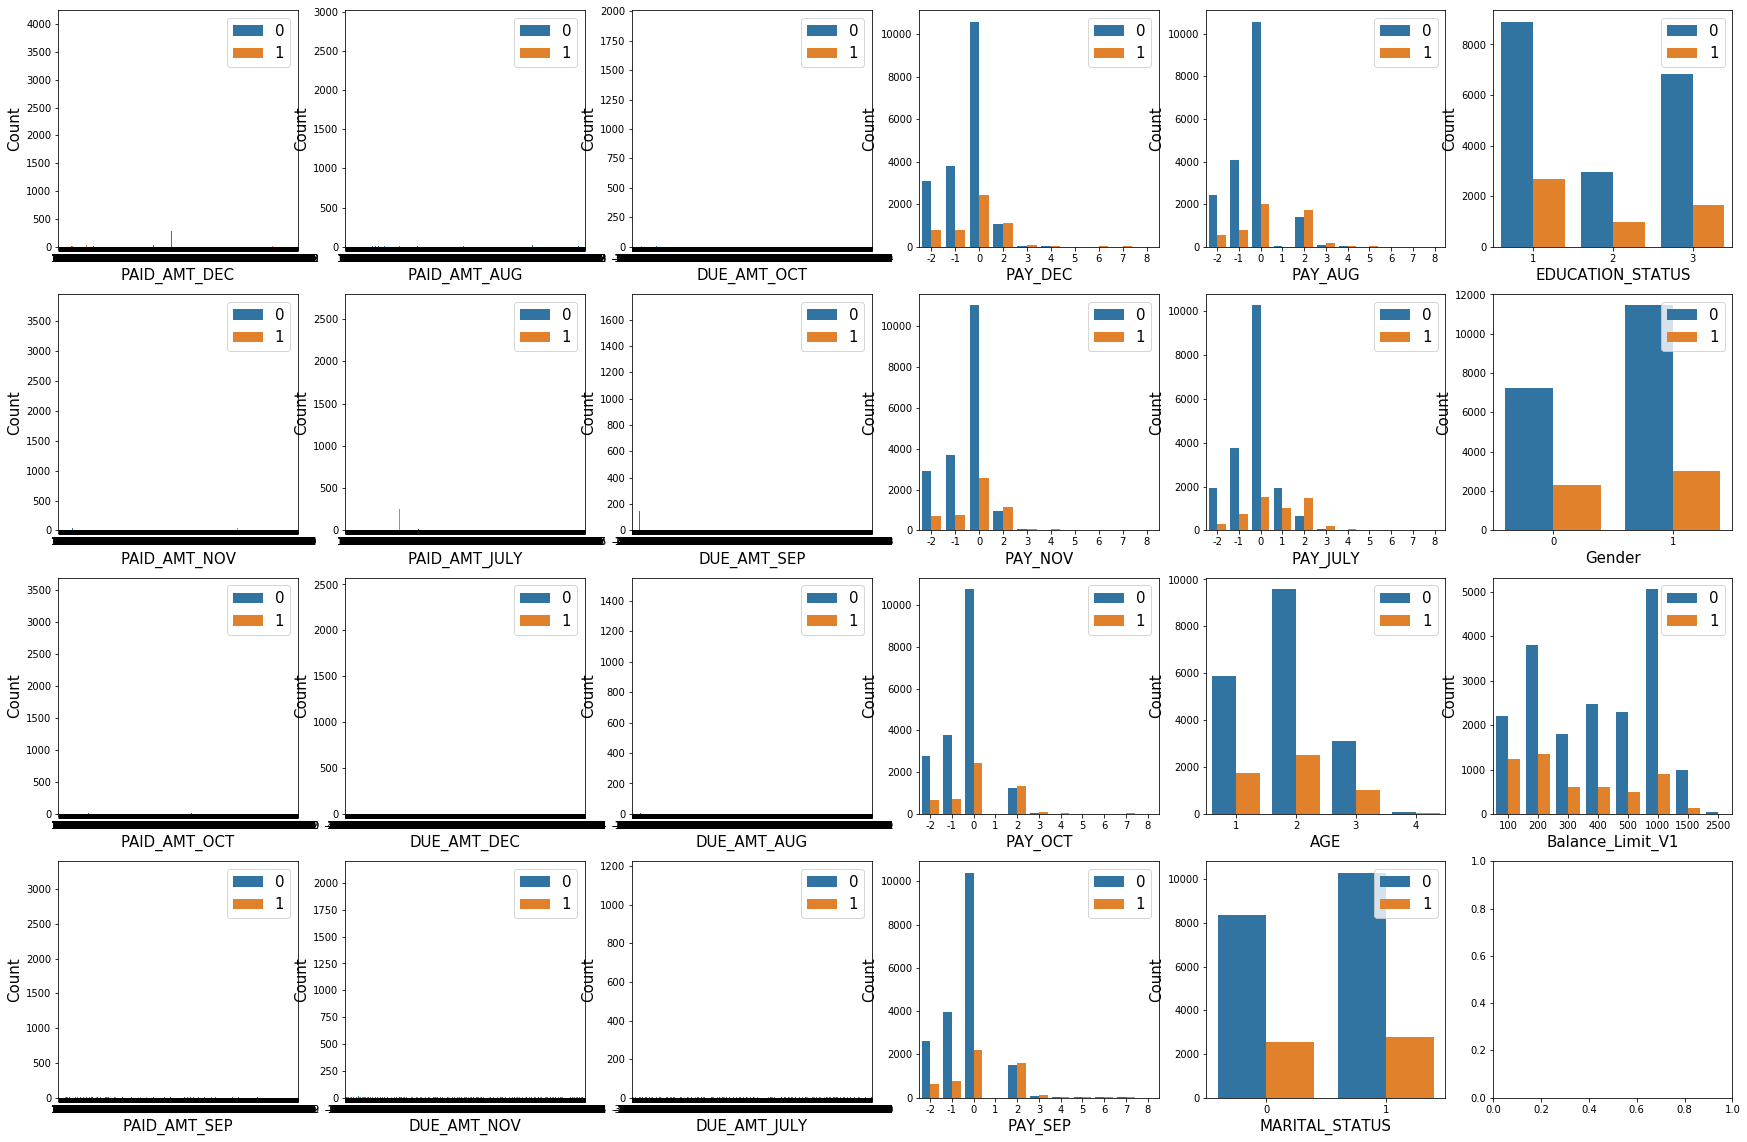

In [27]:
t=[ 'Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC']

cols=t[::-1]
#make the subplot size
n_cols=6
n_rows=4
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*5,n_rows*5))
for c in range (n_cols):
    for r in range (n_rows):
        i=c*n_rows + r #index to subplot
        ax = axs[r][c]
        sns.countplot(Data[cols[i]],hue=Data['NEXT_MONTH_DEFAULT'],ax=ax)
        ax.legend(loc="upper right",fontsize=15)
        ax.set_xlabel(cols[i],fontsize=15);
        ax.set_ylabel('Count',fontsize=15);